In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import r2_score,root_mean_squared_error
from sklearn.tree import DecisionTreeRegressor,plot_tree

In [6]:
df=pd.read_excel('Cleaned.xlsx')

In [7]:
df

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type_Diesel,Seller_Type_Individual,Transmission_Manual
0,2014,3.35,1.720979,98.907149,0,0,1
1,2013,4.75,2.255493,116.919996,1,0,1
2,2017,7.25,2.287471,60.252218,0,0,1
3,2011,2.85,1.423108,54.300312,0,0,1
4,2014,4.60,1.927164,116.381220,1,0,1
...,...,...,...,...,...,...,...
291,2016,9.50,2.451005,107.449775,1,0,1
292,2015,4.00,1.774952,131.742217,0,0,1
293,2009,3.35,2.397895,151.021928,0,0,1
294,2017,11.50,2.525729,66.406442,1,0,1


In [8]:
X=df.drop(['Selling_Price'],axis=1)
y=df['Selling_Price']

In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=94)

In [26]:
dtr=DecisionTreeRegressor(criterion='absolute_error',max_depth=6,min_samples_leaf=1,min_samples_split=2)
dtr.fit(X_train,y_train)
y_train_pred=dtr.predict(X_train)
train_r2=r2_score(y_train,y_train_pred)
crossvalidation=cross_val_score(dtr,X_train,y_train,cv=5,scoring='r2').mean()
print('train_r2:',train_r2)
print('cross_validation:',crossvalidation)

train_r2: 0.9793621661022684
cross_validation: 0.8840173687791554


In [28]:
#Evaluation
y_test_pred=dtr.predict(X_test)
test_r2=r2_score(y_test,y_test_pred)
print('test_r2:',test_r2)

test_r2: 0.9439798760388103


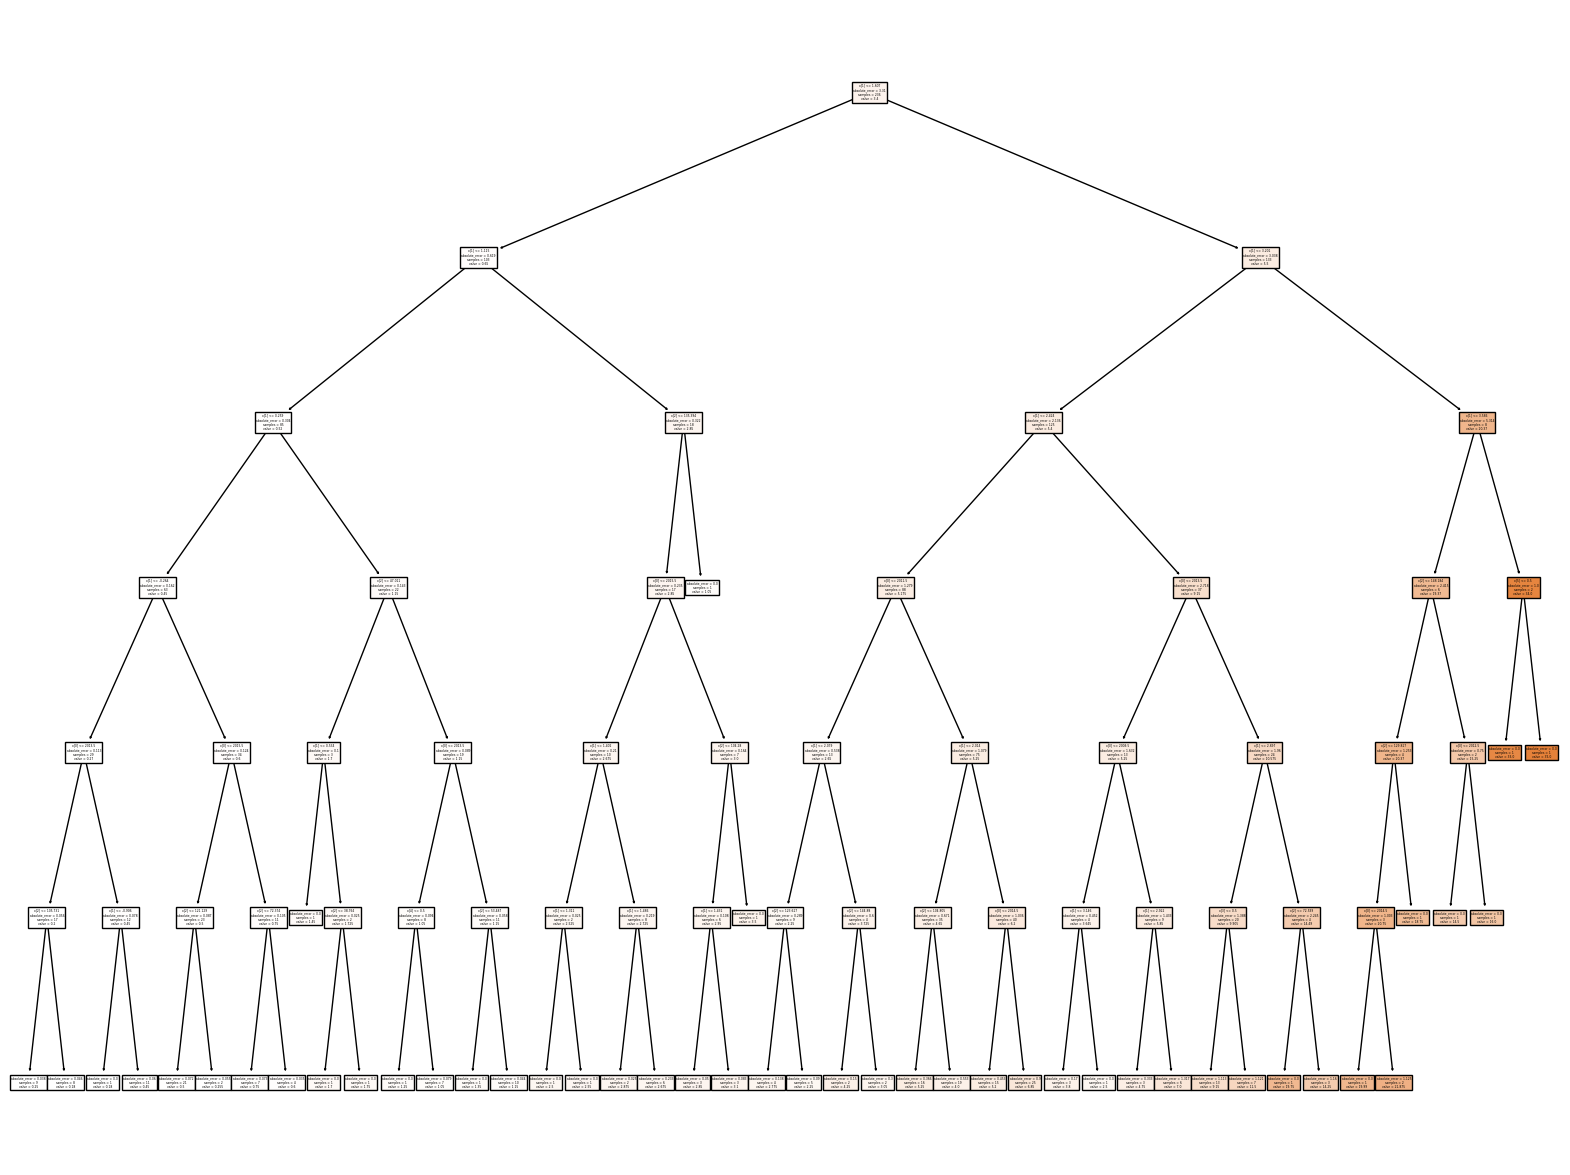

In [30]:
plt.figure(figsize=[20,15])
plot_tree(dtr,filled=True)
plt.show()

In [24]:
estimator=DecisionTreeRegressor()
param_grid={'criterion':['absolute_error'],
            'min_samples_split':list(range(1,30)),
            'min_samples_leaf':list(range(1,10)),
            'max_depth':list(range(1,15))}
gd=GridSearchCV(estimator,param_grid,cv=5,scoring='r2')
gd.fit(X_train,y_train)
gd.best_params_

C:\Users\shiva\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
1260 fits failed out of a total of 36540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1260 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\shiva\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shiva\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\shiva\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\shiva\anaconda3\Lib\site-pa

{'criterion': 'absolute_error',
 'max_depth': 6,
 'min_samples_leaf': 1,
 'min_samples_split': 2}